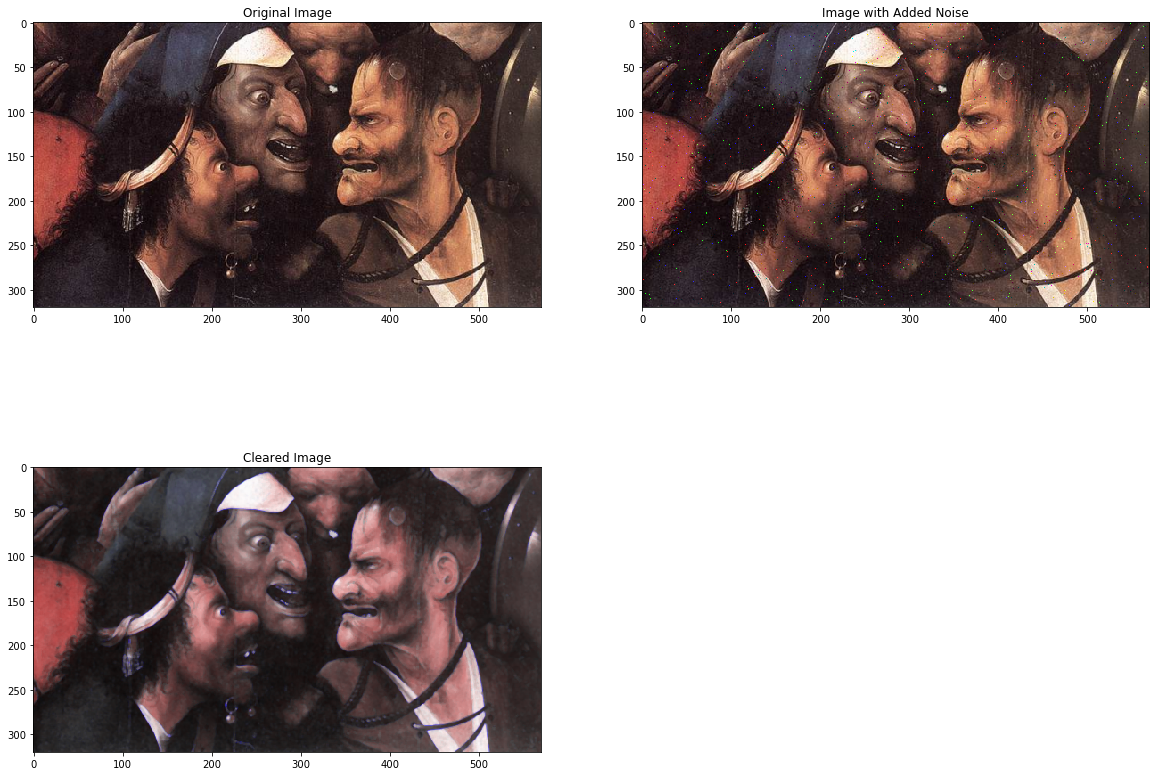

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage

from skimage import io
from skimage import feature
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, dilation, opening, closing

original_image = img.imread('image1.png')

# adding salt&pepper noise to an image via 'addNoise' function

def addNoise(image):
    row, col, ch = image.shape
    snp = 0.4
    amount = 0.003
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * snp)
    coords = [np.random.randint(0, i - 1, int(num_salt))
    for i in image.shape]
    out[coords] = 1
    # Pepper mode
    num_pepper = np.ceil(amount * image.size * (1. - snp))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
    for i in image.shape]
    out[coords] = 0
    return out


noisy_image = addNoise(original_image)

original_image = img.imread('image1.png')

cleared_image = ndimage.median_filter(noisy_image, size = 3)

fig = plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(222), plt.imshow(noisy_image)
plt.title('Image with Added Noise')
plt.subplot(223), plt.imshow(cleared_image)
plt.title('Cleared Image')

plt.show()

# the difference between original, noisy & cleaned images is shown below
# some color was corrected on 'Cleared Image', seems like it is more 'blue' now
# noise cancellation worked adequately, no 'salt-and-pepper' left